In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
student_df = pd.read_csv("StudentsPerformance.csv")
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
student_df.shape

(1000, 8)

In [8]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
print(student_df.groupby("gender").mean())
print(student_df.groupby("race/ethnicity").mean())
print(student_df.groupby("parental level of education").mean())

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203
                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143
                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881 

In [34]:
group_race = student_df["race/ethnicity"].unique()
grouped_df = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("--------------------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("--------------------------------------------------------------")
    for i in range(0, len(group_race)):
        for j in range(i+1, len(group_race)):
            print("t-test between groups {0} and {1}:".format(group_race[i], group_race[j]))
            print(stats.ttest_ind(
            student_df[student_df["race/ethnicity"]==group_race[i]][var], 
            student_df[student_df["race/ethnicity"]==group_race[j]][var]
        ))
        

--------------------------------------------------------------
Comparisons for variable: math score
--------------------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between 

It appears that females score higher on the reading and writing test than the males. Group E in the race/ethnicity scores higher on all of the tests than the other groups. The students with a master's degree score higher on average than all of the other parental level of education.

In [20]:
print(student_df.groupby("lunch").mean())

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


In [36]:
group_lunch = student_df["lunch"].unique()
grouped_df = student_df.groupby("lunch")
for var in ["math score", "reading score", "writing score"]:
    print("--------------------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("--------------------------------------------------------------")
    for i in range(0, len(group_lunch)):
        for j in range(i+1, len(group_lunch)):
            print("t-test between groups {0} and {1}:".format(group_lunch[i], group_lunch[j]))
            print(stats.ttest_ind(
            student_df[student_df["lunch"]==group_lunch[i]][var], 
            student_df[student_df["lunch"]==group_lunch[j]][var]
        ))
        

--------------------------------------------------------------
Comparisons for variable: math score
--------------------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
--------------------------------------------------------------
Comparisons for variable: reading score
--------------------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
--------------------------------------------------------------
Comparisons for variable: writing score
--------------------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


It appears those students that have a standard lunch score better on average than the students on free/reduced lunch.There are many reasons why a student on free and reduced might not achieve at the same level as a student that recieves a standard lunch. One is the free and reduced student might not have the support at home they need to be more successful. If you were to compare the free/reduced students with the parent level of education, you might see that many of the students on free and reduced lunch have parents that did not complete a high level of education. This reduces the priority of education in the household and the student can suffer.

In [21]:
print(student_df.groupby("test preparation course").mean())

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


Across the board it appears that if you complete the test preparation course they score higher on the tests.

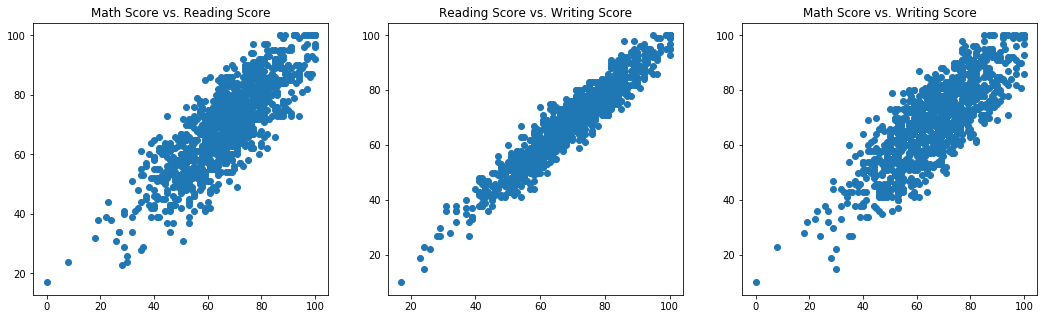

In [25]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(student_df["math score"], student_df["reading score"])
plt.title("Math Score vs. Reading Score")

plt.subplot(1,3,2)
plt.scatter(student_df["reading score"], student_df["writing score"])
plt.title("Reading Score vs. Writing Score")

plt.subplot(1,3,3)
plt.scatter(student_df["math score"], student_df["writing score"])
plt.title("Math Score vs. Writing Score")

plt.show()

In [26]:
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Visually you can see that reading and writing are the most closely correlated. Then when we run the correlation coefficient we can see that it is true with a 0.95 correlation coefficient.